In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score

from sklearn.linear_model import LinearRegression

In [4]:
df = pd.read_csv('insurance.csv')

In [5]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [6]:
df.shape

(1338, 7)

This dataset contains 1338 rows of data with 7 features. The features are the information of the client. The objective is to construct a machine learning model to predict the insurance price with client's information.

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**Handling Missing Data**

In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There is no any null value in this dataset. Hence, we are good to proceed.

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

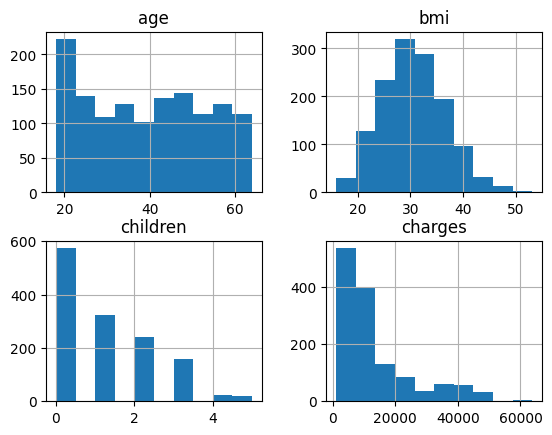

In [10]:
df.hist()

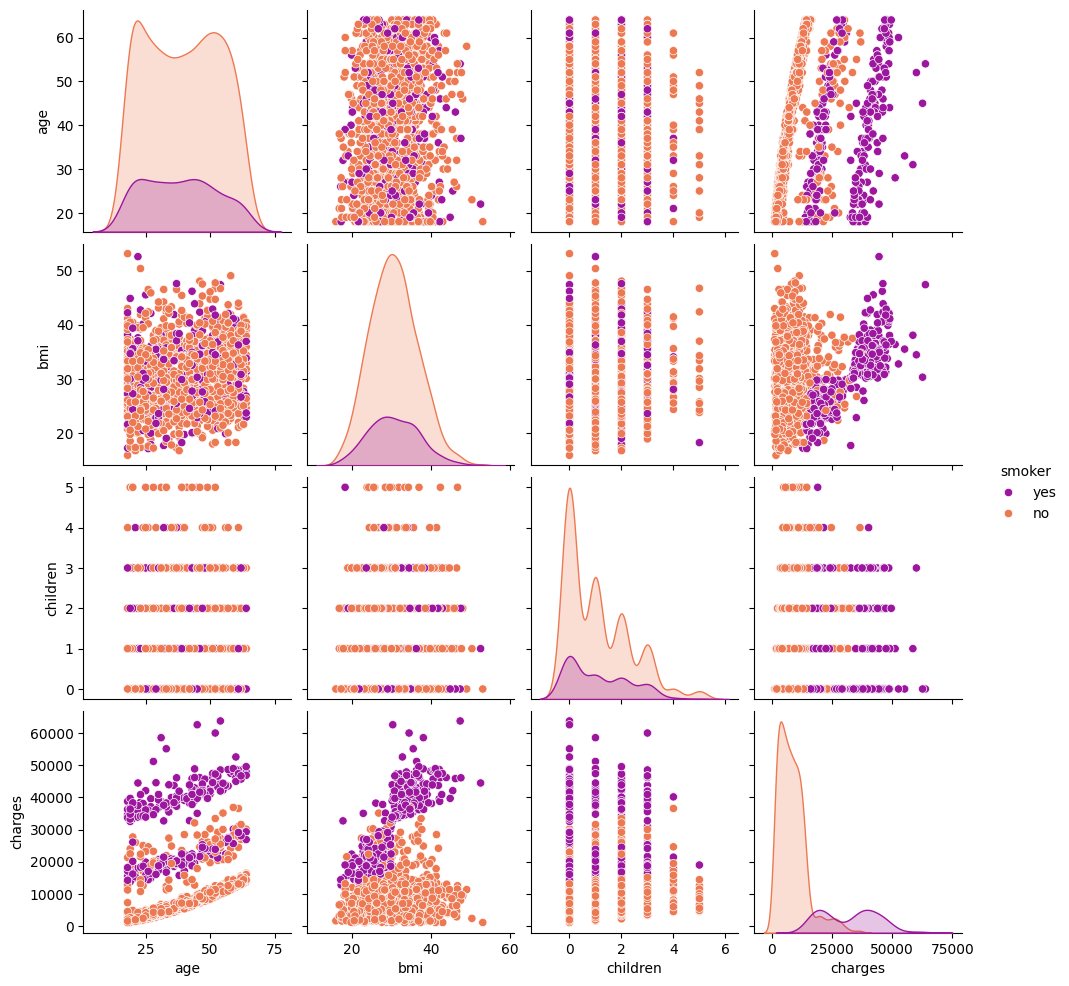

In [11]:
sns.pairplot(df, vars=["age", 'bmi','children','charges'],hue='smoker',palette="plasma")
plt.show()

What can we see from the plots
1. Smoking contributes to higher medical charges
2. The greater the age, the greater the medical charges.

In [12]:
s = (df.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['sex', 'smoker', 'region']


In [13]:
label_df = df.copy()

label_encoder = LabelEncoder()
for col in object_cols:
    label_df[col] = label_encoder.fit_transform(label_df[col])
    print(f"Column: {col}")
    print("Original values:", label_encoder.classes_)
    print("Encoded values:", label_encoder.transform(label_encoder.classes_))
    print()

label_df.head()

Column: sex
Original values: ['female' 'male']
Encoded values: [0 1]

Column: smoker
Original values: ['no' 'yes']
Encoded values: [0 1]

Column: region
Original values: ['northeast' 'northwest' 'southeast' 'southwest']
Encoded values: [0 1 2 3]



,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [14]:
#list of all the numeric columns
num = df.select_dtypes('number').columns.to_list()
#list of all the categoric columns
cat = df.select_dtypes('object').columns.to_list()

#numeric df
loan_num =  df[num]
#categoric df
loan_cat = df[cat]
sns.set(style="whitegrid")

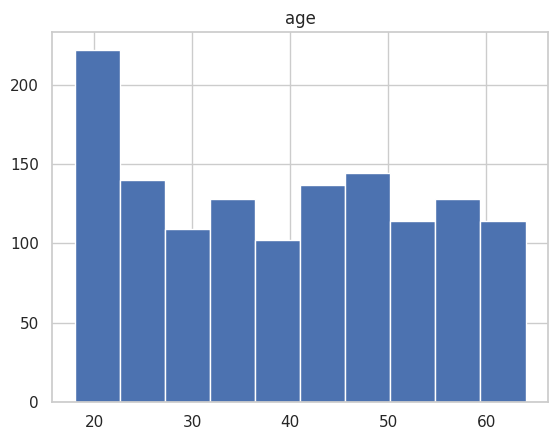

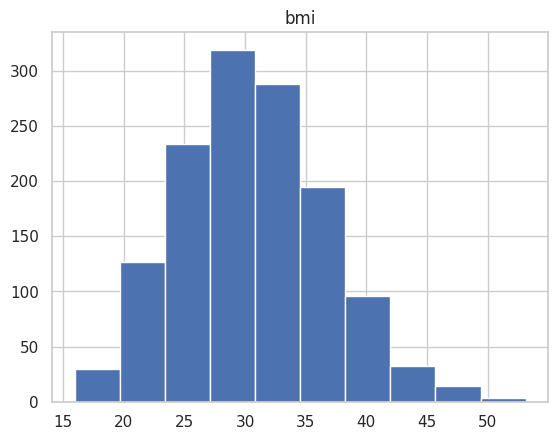

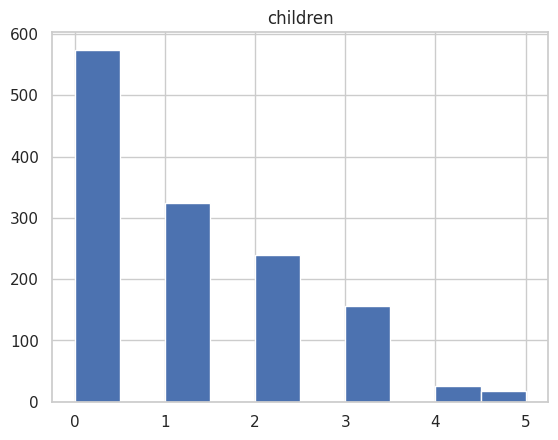

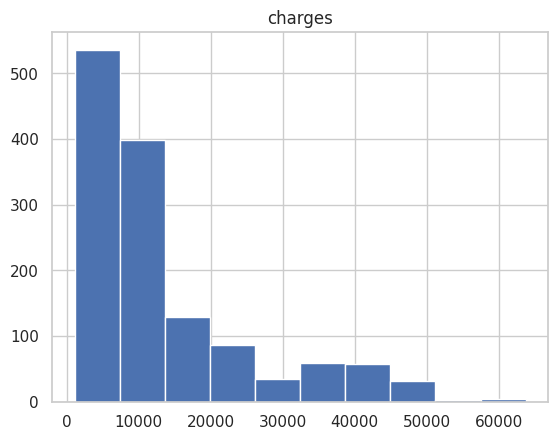

In [15]:
for i in loan_num:
    plt.hist(loan_num[i])
    plt.title(i)
    plt.show()

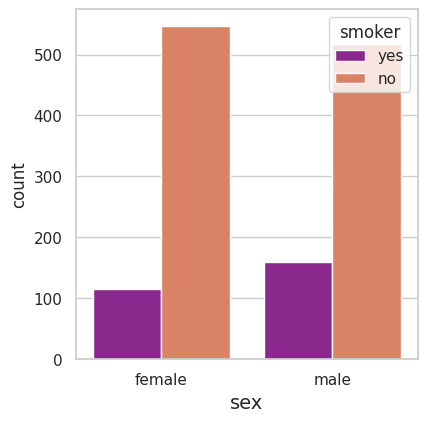

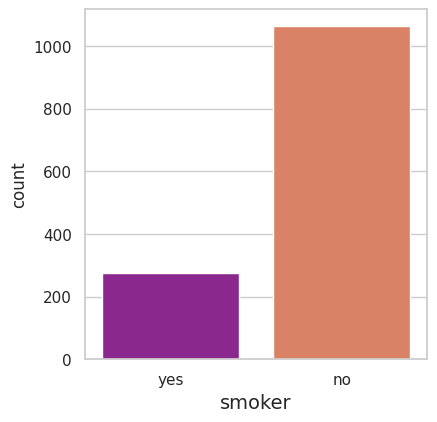

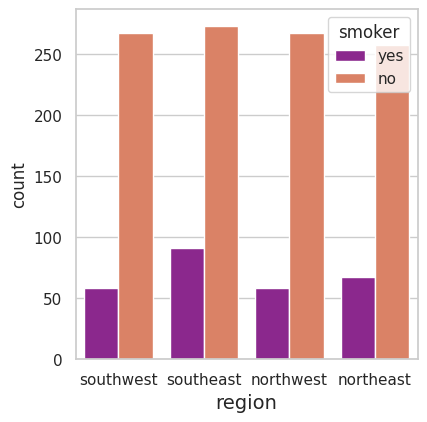

In [16]:
for i in cat:
    plt.figure(figsize=(15,10))
    plt.subplot(2,3,1)
    sns.countplot(x=i ,hue='smoker', data=df ,palette='plasma')
    plt.xlabel(i, fontsize=14)

<Axes: >

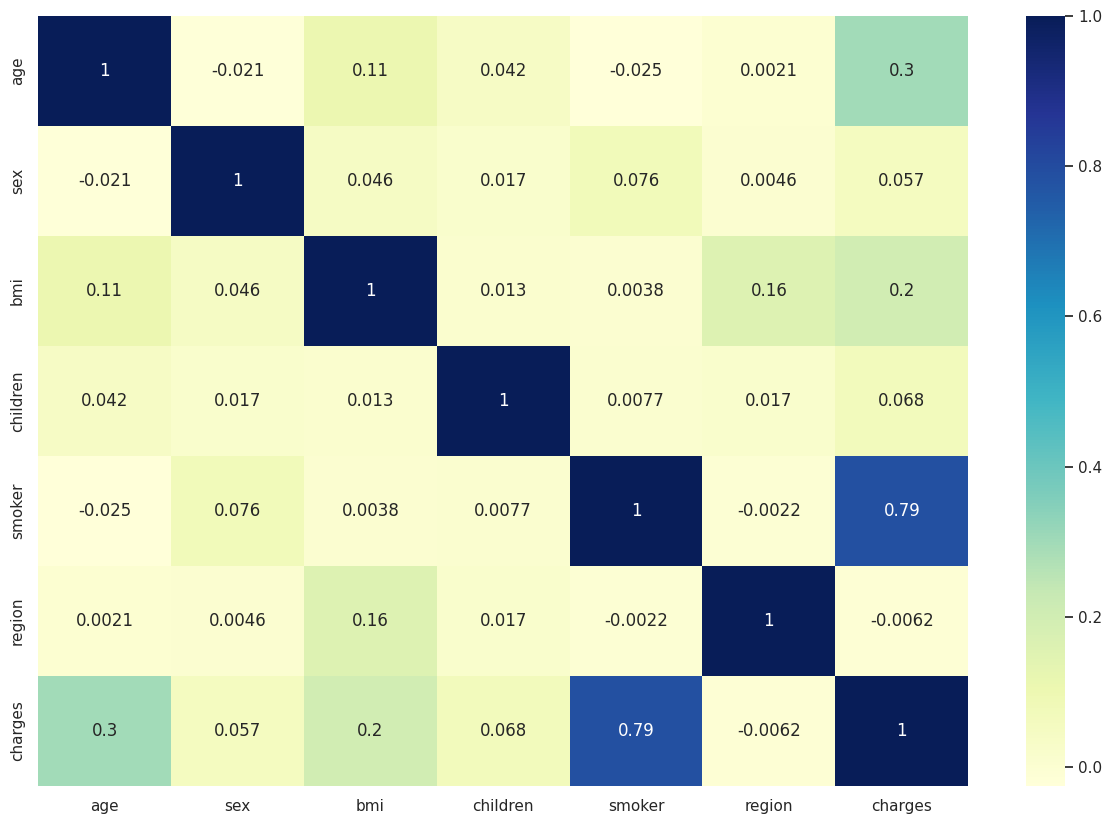

In [17]:
plt.figure(figsize = (15,10))
sns.heatmap(label_df.corr(), annot = True, cmap = 'YlGnBu')

The heatmap plots the correlationship between each features. From the heatmap we can see that smoking is highly correlated to the charges. Followed by age and bmi.

**Linear Regression**

I will use linear regression to predict the charges with age and smoker


In [18]:
X = label_df.drop(['charges'], axis = 1)
y = label_df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [19]:
scaler = StandardScaler()
label_df = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns = ['age','sex','bmi','children','smoker','region'])
label_df = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test, columns = ['age','sex','bmi','children','smoker','region'])

In [20]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print('Intercept: ', lr.intercept_)
print('Coefficient:', lr.coef_)
print('Accuracy:', lr.score(X_test, y_test))

Intercept:  -11661.98390882441
Coefficient: [  253.99185244   -24.32455098   328.40261701   443.72929547
 23568.87948381  -288.50857254]
Accuracy: 0.7998747145449959


In [21]:
mse = mean_squared_error(y_test, y_pred)
r2_square = r2_score(y_test,y_pred)
print(f" R-squared: {r2_square}")
print(f'Mean Squared Error: {mse}')

 R-squared: 0.7998747145449959
Mean Squared Error: 31845929.13415943


In [22]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
578,9724.53000,11017.230479,-1292.700479
610,8547.69130,9787.530168,-1239.838868
569,45702.02235,37994.782118,7707.240232
1034,12950.07120,16122.778407,-3172.707207
198,9644.25250,6930.759230,2713.493270
...,...,...,...
1084,15019.76005,14699.098767,320.661283
726,6664.68595,8210.854549,-1546.168599
1132,20709.02034,16019.284542,4689.735798
725,40932.42950,33104.944084,7827.485416
